In [1]:
import pandas as pd

In [2]:
GDP = pd.read_csv("data/economic_indicators/GDP")
FEDFUNDS = pd.read_csv("data/economic_indicators/FEDFUNDS")
CPIAUCSL = pd.read_csv("data/economic_indicators/CPIAUCSL")
UNRATE = pd.read_csv("data/economic_indicators/UNRATE")
GS10 = pd.read_csv("data/economic_indicators/GS10")
INDPRO = pd.read_csv("data/economic_indicators/INDPRO")
PPIACO = pd.read_csv("data/economic_indicators/PPIACO")
RSXFS = pd.read_csv("data/economic_indicators/RSXFS")
HOUST = pd.read_csv("data/economic_indicators/HOUST")
PSAVERT = pd.read_csv("data/economic_indicators/PSAVERT")




In [3]:
indicators = [
            GDP, CPIAUCSL, UNRATE, FEDFUNDS, GS10,
        INDPRO, PPIACO, RSXFS, HOUST, PSAVERT
    ]
for ind in indicators:
    print(ind.shape)

(309, 2)
(928, 2)
(916, 2)
(838, 2)
(853, 2)
(1264, 2)
(1336, 2)
(388, 2)
(784, 2)
(783, 2)


In [4]:
for ind in indicators:
    ind.columns = ['Date', ind.columns[1]]

# Merging based on the Date column
merged_df = GDP
for ind in indicators[1:]:
    merged_df = pd.merge(merged_df, ind, on='Date', how='outer')

print(merged_df.shape)

(1336, 11)


In [5]:
merged_df.dropna(inplace=True)


In [6]:
merged_df.shape

(129, 11)

In [7]:
merged_df.to_csv("./data/indicators.csv")

In [8]:
from data_collection.collect_num_data import get_economic_indicators, get_historical_prices, get_dividends_and_earnings


In [9]:
portfolio_csv = "portfolio_files/Apr-2025 portfolio.csv"
portfolio_df = pd.read_csv(portfolio_csv)
portfolio_symbols = portfolio_df["Symbol"]


In [10]:
import matplotlib.pyplot as plt


In [11]:
for symbol in ["GOOG"]:
    hist_data = get_historical_prices(symbol)
    try:
        hist_data.index = pd.to_datetime(hist_data.index)
        hist_data.index = hist_data.index.strftime('%Y-%m-%d')
    except Exception as e:
        print(e)
    hist_data.to_csv(f"./data/historical/{symbol}.csv")


In [12]:
indicators_df = pd.read_csv("data/indicators.csv")

In [13]:
indicators_df.drop(columns=["Unnamed: 0"],inplace=True)

In [14]:
goog_df =  pd.read_csv("data/historical/GOOG.csv")
jpm_df =  pd.read_csv("data/historical/JPM.csv")
msft_df =  pd.read_csv("data/historical/MSFT.csv")
nvda_df =  pd.read_csv("data/historical/NVDA.csv")
voo_df =  pd.read_csv("data/historical/VOO.csv")

In [15]:
dataframes = {
    'GOOG': goog_df,
}

In [16]:
combined_df = pd.concat([df.set_index('Date') for df in dataframes.values()], axis=1, keys=dataframes.keys())
combined_df.reset_index(inplace=True)

In [17]:
combined_df

Date        GOOG                                               
                        Open        High         Low       Close     Volume
0     2004-08-19    2.484562    2.585435    2.384187    2.493011  897427216
1     2004-08-20    2.509657    2.710161    2.496986    2.691030  458857488
2     2004-08-23    2.751654    2.819482    2.709416    2.718112  366857939
3     2004-08-24    2.763828    2.772772    2.573261    2.605561  306396159
4     2004-08-25    2.607797    2.683328    2.580964    2.633636  184645512
...          ...         ...         ...         ...         ...        ...
5047  2024-09-09  153.630005  154.639999  148.199997  149.539993   28057700
5048  2024-09-10  151.449997  152.300003  149.542999  150.009995   20401800
5049  2024-09-11  151.089996  152.479996  148.699997  152.149994   18991500
5050  2024-09-12  154.809998  155.610001  153.500000  155.539993   21024100
5051  2024-09-13  156.362000  159.270004  156.119995  158.369995   15881306

[5052 rows x 6 columns]

In [18]:
indicators_df['Date'] = pd.to_datetime(indicators_df['Date'])
combined_df['Date'] = pd.to_datetime(combined_df['Date'])


In [19]:
# Flatten MultiIndex columns
combined_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in combined_df.columns]

# Ensure Date column is correctly named
if 'Date_' in combined_df.columns:
    combined_df.rename(columns={'Date_': 'Date'}, inplace=True)


In [20]:
full_df = pd.merge(combined_df, indicators_df, on='Date', how='left')


In [21]:
full_df

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,GDP,CPIAUCSL,UNRATE,FEDFUNDS,GS10,INDPRO,PPIACO,RSXFS,HOUST,PSAVERT
0,2004-08-19,2.484562,2.585435,2.384187,2.493011,897427216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,2.509657,2.710161,2.496986,2.691030,458857488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-08-23,2.751654,2.819482,2.709416,2.718112,366857939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-08-24,2.763828,2.772772,2.573261,2.605561,306396159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-08-25,2.607797,2.683328,2.580964,2.633636,184645512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,2024-09-09,153.630005,154.639999,148.199997,149.539993,28057700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5048,2024-09-10,151.449997,152.300003,149.542999,150.009995,20401800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5049,2024-09-11,151.089996,152.479996,148.699997,152.149994,18991500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5050,2024-09-12,154.809998,155.610001,153.500000,155.539993,21024100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)


In [23]:
full_df_imputed = full_df.copy()
full_df_imputed.iloc[:, 1:] = imputer.fit_transform(full_df_imputed.iloc[:, 1:])


In [24]:
full_df_imputed

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,GDP,CPIAUCSL,UNRATE,FEDFUNDS,GS10,INDPRO,PPIACO,RSXFS,HOUST,PSAVERT
0,2004-08-19,2.484562,2.585435,2.384187,2.493011,897427216,13613.2844,202.0674,5.44,2.212,4.022,96.65428,167.720,312413.6,1595.4,2.94
1,2004-08-20,2.509657,2.710161,2.496986,2.691030,458857488,13613.2844,202.0674,5.44,2.212,4.022,96.65428,167.720,312413.6,1595.4,2.94
2,2004-08-23,2.751654,2.819482,2.709416,2.718112,366857939,13613.2844,202.0674,5.44,2.212,4.022,96.65428,167.720,312413.6,1595.4,2.94
3,2004-08-24,2.763828,2.772772,2.573261,2.605561,306396159,13613.2844,202.0674,5.44,2.212,4.022,96.65428,167.720,312413.6,1595.4,2.94
4,2004-08-25,2.607797,2.683328,2.580964,2.633636,184645512,14956.9160,216.7830,7.58,1.434,3.496,94.71790,187.600,324984.0,766.8,5.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,2024-09-09,153.630005,154.639999,148.199997,149.539993,28057700,20596.6118,251.9872,4.78,0.970,2.326,102.41466,211.433,446223.6,1241.4,6.20
5048,2024-09-10,151.449997,152.300003,149.542999,150.009995,20401800,22310.6100,262.6494,4.24,1.014,1.962,101.12094,217.112,486743.2,1452.8,6.52
5049,2024-09-11,151.089996,152.479996,148.699997,152.149994,18991500,22310.6100,262.6494,4.24,1.014,1.962,101.12094,217.112,486743.2,1452.8,6.52
5050,2024-09-12,154.809998,155.610001,153.500000,155.539993,21024100,22310.6100,262.6494,4.24,1.014,1.962,101.12094,217.112,486743.2,1452.8,6.52


In [25]:
full_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5052 non-null   datetime64[ns]
 1   GOOG_Open    5052 non-null   float64       
 2   GOOG_High    5052 non-null   float64       
 3   GOOG_Low     5052 non-null   float64       
 4   GOOG_Close   5052 non-null   float64       
 5   GOOG_Volume  5052 non-null   int64         
 6   GDP          5052 non-null   float64       
 7   CPIAUCSL     5052 non-null   float64       
 8   UNRATE       5052 non-null   float64       
 9   FEDFUNDS     5052 non-null   float64       
 10  GS10         5052 non-null   float64       
 11  INDPRO       5052 non-null   float64       
 12  PPIACO       5052 non-null   float64       
 13  RSXFS        5052 non-null   float64       
 14  HOUST        5052 non-null   float64       
 15  PSAVERT      5052 non-null   float64       
dtypes: dat

In [26]:
import numpy as np

# Feature Engineering


In [27]:
stocks = ['GOOG']
economic_indicators = ['GDP', 'CPIAUCSL', 'UNRATE', 'FEDFUNDS', 'GS10', 'INDPRO', 'PPIACO', 'RSXFS', 'HOUST', 'PSAVERT']


In [28]:
# Log Returns for each stock (Relevant for modeling risk and capturing the stock's behavior over time)
for stock in stocks:
    full_df_imputed[f'{stock}_LogReturn'] = np.log(full_df_imputed[f'{stock}_Close'] / full_df_imputed[f'{stock}_Close'].shift(1))


In [29]:
full_df_imputed.tail()

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,GDP,CPIAUCSL,UNRATE,FEDFUNDS,GS10,INDPRO,PPIACO,RSXFS,HOUST,PSAVERT,GOOG_LogReturn
5047,2024-09-09,153.630005,154.639999,148.199997,149.539993,28057700,20596.6118,251.9872,4.78,0.970,2.326,102.41466,211.433,446223.6,1241.4,6.20,-0.015856
5048,2024-09-10,151.449997,152.300003,149.542999,150.009995,20401800,22310.6100,262.6494,4.24,1.014,1.962,101.12094,217.112,486743.2,1452.8,6.52,0.003138
5049,2024-09-11,151.089996,152.479996,148.699997,152.149994,18991500,22310.6100,262.6494,4.24,1.014,1.962,101.12094,217.112,486743.2,1452.8,6.52,0.014165
5050,2024-09-12,154.809998,155.610001,153.500000,155.539993,21024100,22310.6100,262.6494,4.24,1.014,1.962,101.12094,217.112,486743.2,1452.8,6.52,0.022036
5051,2024-09-13,156.362000,159.270004,156.119995,158.369995,15881306,22310.6100,262.6494,4.24,1.014,1.962,101.12094,217.112,486743.2,1452.8,6.52,0.018031


In [30]:
# Rolling Volatility for each stock (Relevant for identifying periods of high/low risk)
for stock in stocks:
    full_df_imputed[f'{stock}_RollingVolatility_30d'] = full_df_imputed[f'{stock}_LogReturn'].rolling(window=30).std()


In [31]:
# Percentage changes in economic indicators (Capture macroeconomic shifts and trends, important for risk modeling)
for indicator in economic_indicators:
    full_df_imputed[f'{indicator}_PctChange'] = full_df_imputed[indicator].pct_change()


In [32]:
# Moving averages of stock closing prices (Relevant for identifying trends and stock behavior over time)
for stock in stocks:
    full_df_imputed[f'{stock}_MA10'] = full_df_imputed[f'{stock}_Close'].rolling(window=10).mean()  # Short-term trend
    full_df_imputed[f'{stock}_MA200'] = full_df_imputed[f'{stock}_Close'].rolling(window=200).mean()  # Long-term trend


In [33]:
# Lag features for log returns and economic indicators (Relevant for capturing past behavior and predicting future movements)
lags = [1, 5, 10]
for stock in stocks:
    for lag in lags:
        full_df_imputed[f'{stock}_LogReturn_Lag{lag}'] = full_df_imputed[f'{stock}_LogReturn'].shift(lag)

for indicator in economic_indicators:
    for lag in lags:
        full_df_imputed[f'{indicator}_PctChange_Lag{lag}'] = full_df_imputed[f'{indicator}_PctChange'].shift(lag)

In [34]:
# Maximum drawdown for each stock (Capture the largest loss from peak to trough, relevant for modeling worst-case scenarios)
for stock in stocks:
    full_df_imputed[f'{stock}_MaxDrawdown'] = full_df_imputed[f'{stock}_Close'].rolling(window=252, min_periods=1).apply(lambda x: (x.max() - x.min()) / x.max(), raw=True)

In [35]:
# Rolling correlation between stock log returns (Relevant for understanding stock relationships, which can impact portfolio risk)
for i, stock1 in enumerate(stocks):
    for stock2 in stocks[i+1:]:
        full_df_imputed[f'{stock1}_{stock2}_RollingCorr_30d'] = full_df_imputed[f'{stock1}_LogReturn'].rolling(window=30).corr(full_df_imputed[f'{stock2}_LogReturn'])

In [36]:
# Rolling correlation between stock returns and economic indicators (Capture how economic factors affect stock movements)
for stock in stocks:
    for indicator in economic_indicators:
        full_df_imputed[f'{stock}_{indicator}_RollingCorr_30d'] = full_df_imputed[f'{stock}_LogReturn'].rolling(window=30).corr(full_df_imputed[f'{indicator}_PctChange'])


In [37]:
# Outlier detection (Flagging large returns for risk identification, which may indicate unusual events or risks)
for stock in stocks:
    full_df_imputed[f'{stock}_Outliers'] = np.abs(full_df_imputed[f'{stock}_LogReturn']) > (full_df_imputed[f'{stock}_LogReturn'].mean() + 3 * full_df_imputed[f'{stock}_LogReturn'].std())

In [38]:
full_df_imputed.isnull().sum()

Date                             0
GOOG_Open                        0
GOOG_High                        0
GOOG_Low                         0
GOOG_Close                       0
                                ..
GOOG_PPIACO_RollingCorr_30d     32
GOOG_RSXFS_RollingCorr_30d      37
GOOG_HOUST_RollingCorr_30d      37
GOOG_PSAVERT_RollingCorr_30d    37
GOOG_Outliers                    0
Length: 75, dtype: int64

In [39]:
full_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           5052 non-null   datetime64[ns]
 1   GOOG_Open                      5052 non-null   float64       
 2   GOOG_High                      5052 non-null   float64       
 3   GOOG_Low                       5052 non-null   float64       
 4   GOOG_Close                     5052 non-null   float64       
 5   GOOG_Volume                    5052 non-null   int64         
 6   GDP                            5052 non-null   float64       
 7   CPIAUCSL                       5052 non-null   float64       
 8   UNRATE                         5052 non-null   float64       
 9   FEDFUNDS                       5052 non-null   float64       
 10  GS10                           5052 non-null   float64       
 11  INDPRO           

In [40]:
# Drop NaN values caused by the shift and rolling operations
full_df_imputed.dropna(inplace=True)

In [41]:
boolean_columns = full_df_imputed.select_dtypes(include='bool').columns
full_df_imputed[boolean_columns] = full_df_imputed[boolean_columns].astype(int)


In [42]:
full_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4842 entries, 199 to 5051
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           4842 non-null   datetime64[ns]
 1   GOOG_Open                      4842 non-null   float64       
 2   GOOG_High                      4842 non-null   float64       
 3   GOOG_Low                       4842 non-null   float64       
 4   GOOG_Close                     4842 non-null   float64       
 5   GOOG_Volume                    4842 non-null   int64         
 6   GDP                            4842 non-null   float64       
 7   CPIAUCSL                       4842 non-null   float64       
 8   UNRATE                         4842 non-null   float64       
 9   FEDFUNDS                       4842 non-null   float64       
 10  GS10                           4842 non-null   float64       
 11  INDPRO              

In [43]:
full_df_imputed

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,GDP,CPIAUCSL,UNRATE,FEDFUNDS,...,GOOG_CPIAUCSL_RollingCorr_30d,GOOG_UNRATE_RollingCorr_30d,GOOG_FEDFUNDS_RollingCorr_30d,GOOG_GS10_RollingCorr_30d,GOOG_INDPRO_RollingCorr_30d,GOOG_PPIACO_RollingCorr_30d,GOOG_RSXFS_RollingCorr_30d,GOOG_HOUST_RollingCorr_30d,GOOG_PSAVERT_RollingCorr_30d,GOOG_Outliers
199,2005-06-03,7.125477,7.187840,6.892425,6.963236,754108027,13613.2844,202.0674,5.44,2.212,...,-0.077812,0.026531,-0.084014,-0.071424,-0.084867,-0.073863,-0.084431,0.070052,0.003873,0
200,2005-06-06,7.016157,7.298404,7.002243,7.228587,904413304,13613.2844,202.0674,5.44,2.212,...,-0.082359,0.028324,-0.087804,-0.075682,-0.089952,-0.077941,-0.089382,0.075740,0.004849,0
201,2005-06-07,7.381636,7.443501,7.212686,7.282750,976566743,13613.2844,202.0674,5.44,2.212,...,-0.084799,0.029553,-0.088601,-0.078060,-0.092820,-0.079866,-0.092056,0.080554,0.006201,0
202,2005-06-08,7.276042,7.284490,6.907084,6.945843,1031889331,13613.2844,202.0674,5.44,2.212,...,-0.076087,0.026845,-0.077980,-0.070154,-0.083453,-0.071338,-0.082620,0.074439,0.006581,0
203,2005-06-09,7.074047,7.167963,6.970689,7.113551,660109011,13613.2844,202.0674,5.44,2.212,...,-0.075588,0.026427,-0.078592,-0.069610,-0.082781,-0.071109,-0.082062,0.072352,0.005785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,2024-09-09,153.630005,154.639999,148.199997,149.539993,28057700,20596.6118,251.9872,4.78,0.970,...,0.575838,-0.247314,0.045111,0.070564,0.252147,0.600444,0.598020,0.505598,-0.322939,0
5048,2024-09-10,151.449997,152.300003,149.542999,150.009995,20401800,22310.6100,262.6494,4.24,1.014,...,0.523505,-0.280754,0.056413,0.105117,0.261432,0.592724,0.517389,0.423004,-0.345759,0
5049,2024-09-11,151.089996,152.479996,148.699997,152.149994,18991500,22310.6100,262.6494,4.24,1.014,...,0.515448,-0.277735,0.052341,0.102464,0.257395,0.583468,0.509298,0.416151,-0.341782,0
5050,2024-09-12,154.809998,155.610001,153.500000,155.539993,21024100,22310.6100,262.6494,4.24,1.014,...,0.500210,-0.271381,0.046223,0.097958,0.249767,0.566028,0.494060,0.403360,-0.333596,0


# Modeling

In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import GRU
from sklearn.preprocessing import StandardScaler

In [45]:
# Scale the features (excluding the 'Date' and target variable columns)

features = full_df_imputed.columns.difference(['Date', 'GOOG_LogReturn', 'GOOG_RollingVolatility_30d', 'GOOG_MaxDrawdown'])
scaler = StandardScaler()
df_scaled = full_df_imputed.copy()
df_scaled[features] = scaler.fit_transform(full_df_imputed[features])

In [58]:

# Function to train a model for a given target variable
def train_model(X_train_reshaped, X_test_reshaped, y_train, y_test, q=0.05):
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True,input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(GRU(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    # Quantile loss for VaR prediction
    def quantile_loss(q, y_true, y_pred):
        e = (y_true - y_pred)
        return tf.reduce_mean(tf.maximum(q * e, (q - 1) * e), axis=-1)

    # Compile the model
    model.compile(optimizer='nadam', loss=lambda y_true, y_pred: quantile_loss(q, y_true, y_pred))
    
    # Train the model
    history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)
    
    # Predict on test set
    y_pred = model.predict(X_test_reshaped)
    
    return model, y_pred, history

In [59]:
# Function to plot actual vs predicted values
def plot_predictions(y_test, y_pred, target_variable):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label=f'Actual {target_variable}')
    plt.plot(y_pred, label=f'Predicted {target_variable}')
    plt.title(f'Actual vs Predicted {target_variable}')
    plt.legend()
    plt.show()

In [67]:
# Function to plot loss curve
def plot_loss(history, target_variable):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curve for {target_variable}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [60]:
# Function to perform VaR backtesting
def backtest_var(y_test, y_pred, target_variable):
    # Calculate exceedances
    exceedances = (y_test < y_pred.flatten()).sum()
    exceedance_ratio = exceedances / len(y_test)
    print(f'Number of exceedances for {target_variable}: {exceedances}')
    print(f'Exceedance ratio for {target_variable}: {exceedance_ratio}')
    
    # Plot exceedances where actual return is less than predicted VaR
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label=f'Actual {target_variable}', color='blue')
    plt.plot(y_pred, label=f'Predicted VaR for {target_variable}', color='red')
    plt.fill_between(range(len(y_test)), y_pred.flatten(), np.min(y_test), where=y_test < y_pred.flatten(), color='green', label='Exceedance')
    plt.title(f'VaR Exceedance Visualization for {target_variable}')
    plt.legend()
    plt.show()
    
    return exceedance_ratio

In [61]:
# Function to calculate the risk score
def calculate_risk_score(y_test, y_pred, exceedance_ratio):
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Define a risk score based on the exceedance ratio and MAE
    # Example: Higher exceedance ratio and larger MAE indicate higher risk
    risk_score = (exceedance_ratio * 100) + mae * 10  # Scaling MAE to a comparable range
    print(f'Risk Score: {risk_score}')
    
    return risk_score

In [62]:
# List of target variables
target_stock='GOOG'
target_variables = {
    'Log Return': f'{target_stock}_LogReturn',
    'Volatility': f'{target_stock}_RollingVolatility_30d',
    'Max Drawdown': f'{target_stock}_MaxDrawdown'
}

# Scale the features (excluding the 'Date' and target variable columns)
features = full_df_imputed.columns.difference(['Date', 'GOOG_LogReturn', 'GOOG_RollingVolatility_30d', 'GOOG_MaxDrawdown'])
scaler = StandardScaler()
df_scaled = full_df_imputed.copy()
df_scaled[features] = scaler.fit_transform(full_df_imputed[features])

# Dictionary to store models, predictions, and histories
model_dict = {}

In [63]:
# Train-test split and reshape for each target variable
for name, target_variable in target_variables.items():
    print(f'Creating model for {name} ({target_variable})...')
    
    # Create feature matrix (X) and target vector (y)
    X = df_scaled[features].values
    y = df_scaled[target_variable].values

    # Train-test split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Reshape to 3D [samples, time steps, features] for LSTM input
    X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    # Train the model and store results in the dictionary
    model, y_pred, history = train_model(X_train_reshaped, X_test_reshaped, y_train, y_test, q=0.05)
    model_dict[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_test': y_test,
        'history': history,
        'target_variable': target_variable
    }

Creating model for Log Return (GOOG_LogReturn)...
Epoch 1/100


E:\Personal\Risk_management_model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 11/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 12/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Evaluating model for Log Return (GOOG_LogReturn)...


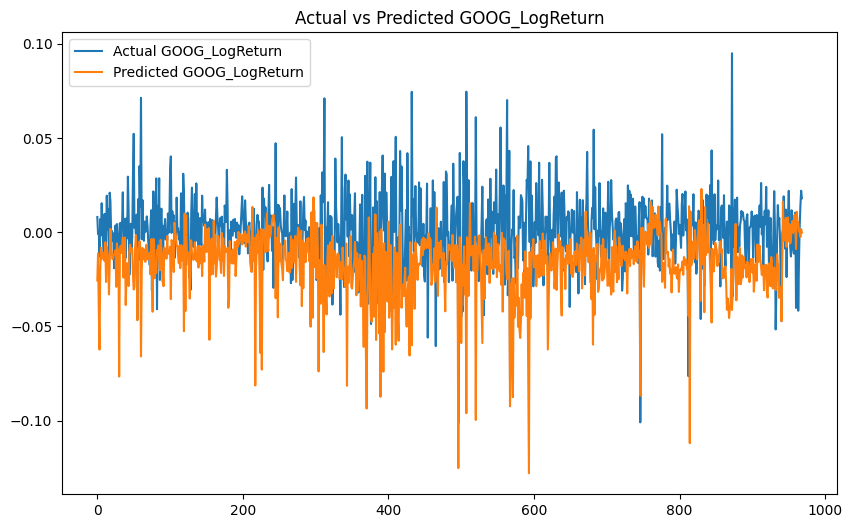


Evaluating model for Volatility (GOOG_RollingVolatility_30d)...


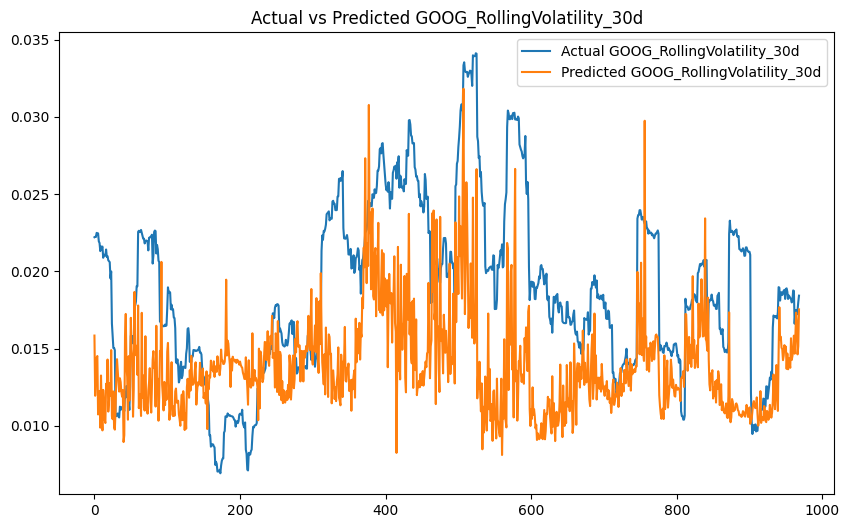


Evaluating model for Max Drawdown (GOOG_MaxDrawdown)...


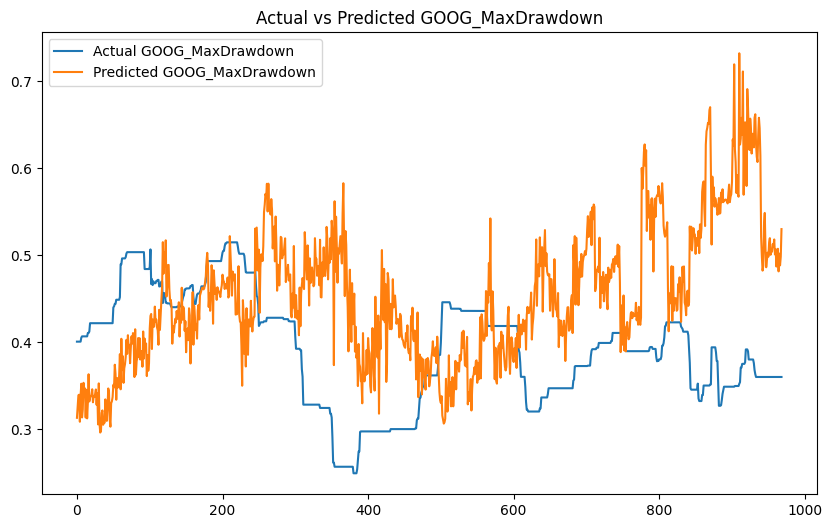

In [64]:
# Plotting and backtesting outside the training loop
for name, data in model_dict.items():
    print(f'\nEvaluating model for {name} ({data["target_vaz
    plot_predictions(data['y_test'], data['y_pred'], data['target_variable'])


Evaluating model for Log Return (GOOG_LogReturn)...
Number of exceedances for GOOG_LogReturn: 190
Exceedance ratio for GOOG_LogReturn: 0.19607843137254902


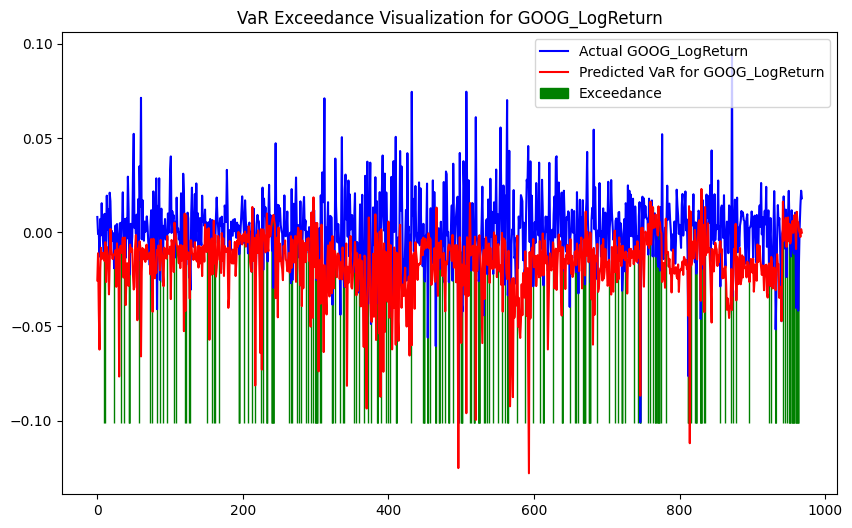


Evaluating model for Volatility (GOOG_RollingVolatility_30d)...
Number of exceedances for GOOG_RollingVolatility_30d: 164
Exceedance ratio for GOOG_RollingVolatility_30d: 0.1692466460268318


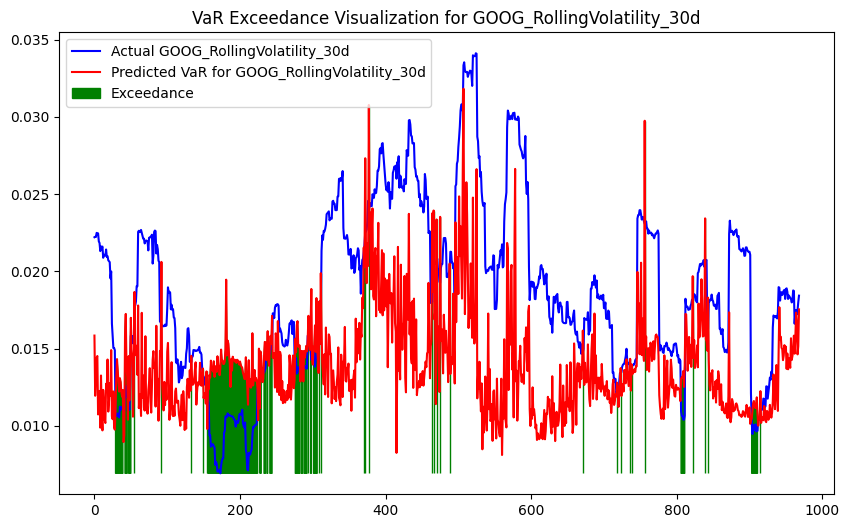


Evaluating model for Max Drawdown (GOOG_MaxDrawdown)...
Number of exceedances for GOOG_MaxDrawdown: 634
Exceedance ratio for GOOG_MaxDrawdown: 0.6542827657378741


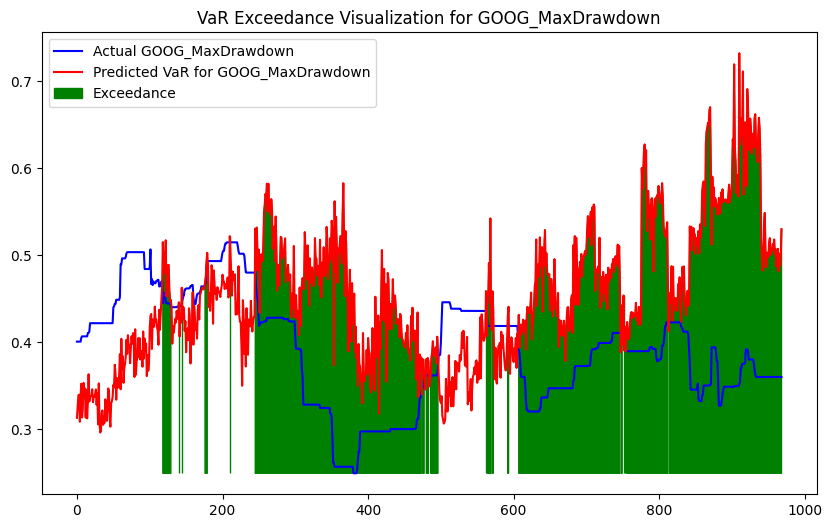

In [65]:
# Plotting and backtesting outside the training loop
for name, data in model_dict.items():
    print(f'\nEvaluating model for {name} ({data["target_variable"]})...')
   
    # Perform VaR backtesting
    backtest_var(data['y_test'], data['y_pred'], data['target_variable'])


Evaluating model for Log Return (GOOG_LogReturn)...
Number of exceedances for GOOG_LogReturn: 190
Exceedance ratio for GOOG_LogReturn: 0.19607843137254902


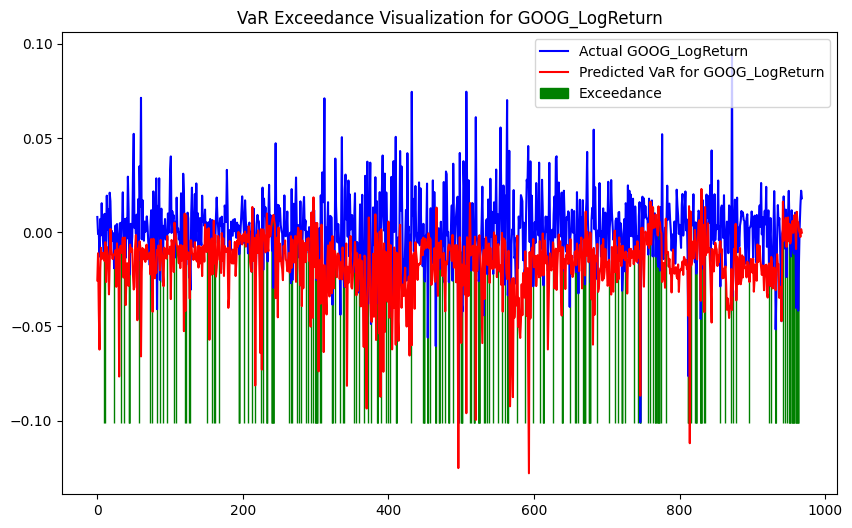

Risk Score: 19.82609427189194

Evaluating model for Volatility (GOOG_RollingVolatility_30d)...
Number of exceedances for GOOG_RollingVolatility_30d: 164
Exceedance ratio for GOOG_RollingVolatility_30d: 0.1692466460268318


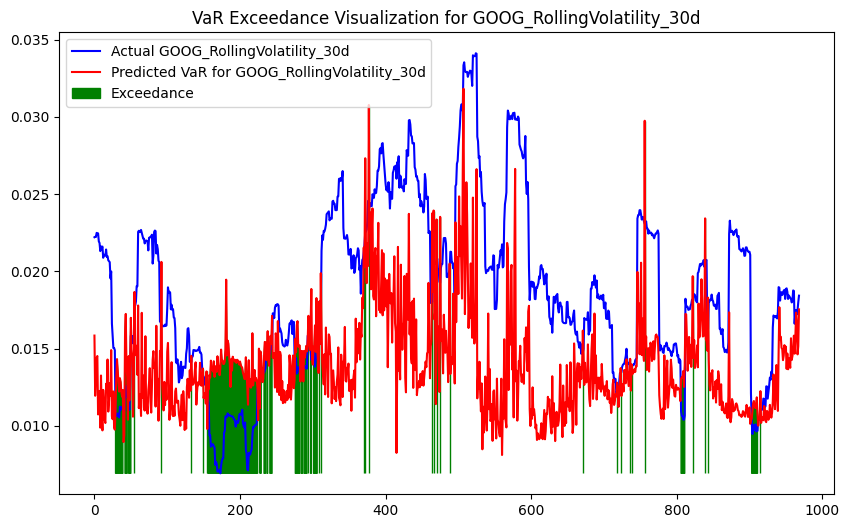

Risk Score: 16.982779947455107

Evaluating model for Max Drawdown (GOOG_MaxDrawdown)...
Number of exceedances for GOOG_MaxDrawdown: 634
Exceedance ratio for GOOG_MaxDrawdown: 0.6542827657378741


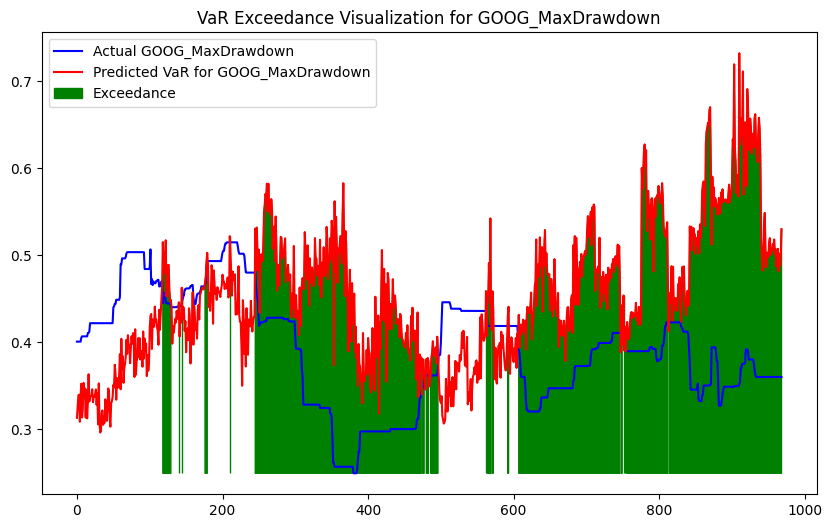

Risk Score: 66.45550710473618


In [66]:
# Plotting, backtesting, and risk score calculation outside the training loop
for name, data in model_dict.items():
    print(f'\nEvaluating model for {name} ({data["target_variable"]})...')
        
    # Perform VaR backtesting and get the exceedance ratio
    exceedance_ratio = backtest_var(data['y_test'], data['y_pred'], data['target_variable'])
    
    # Calculate risk score
    risk_score = calculate_risk_score(data['y_test'], data['y_pred'], exceedance_ratio)

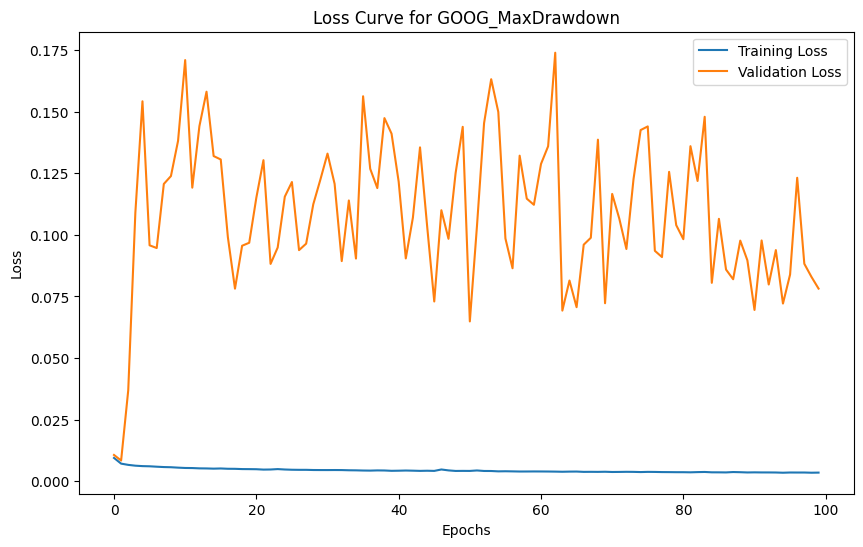

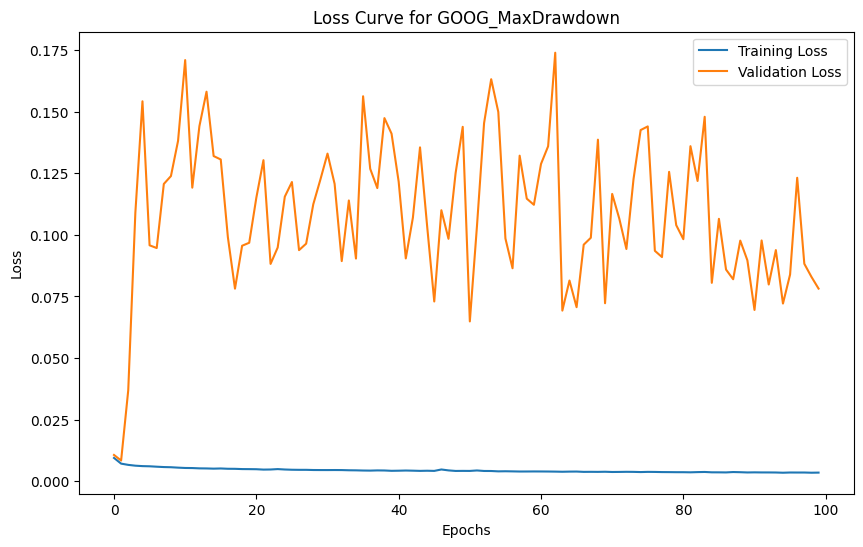

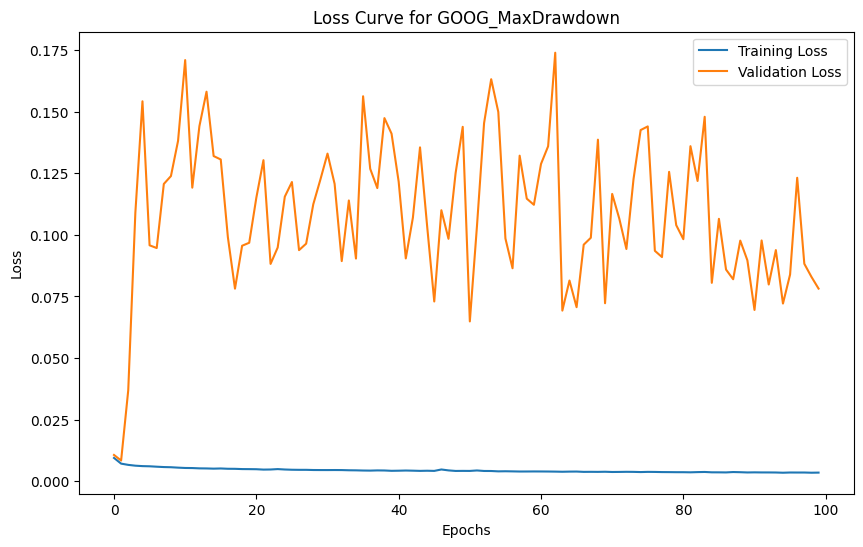

In [68]:
for name, target_variable in target_variables.items():


    # Plot the loss curve for the current model
    plot_loss(data['history'], data['target_variable'])